In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
df = pd.read_csv("data/tableau_import.csv")

In [43]:
RF_classifier = RandomForestClassifier(n_estimators=100)
RF_classifier_2 = RandomForestClassifier(n_estimators=100)

In [10]:
df['partisanship_change']

0        -1.000000
1        -1.000000
2        -0.777778
3        -1.000000
4        -0.333333
            ...   
227272    0.000000
227273   -1.000000
227274   -1.000000
227275   -1.000000
227276   -1.000000
Name: partisanship_change, Length: 227277, dtype: float64

4

In [3]:
def return_change_class(input, weight):
    weight = abs(weight)
    if input < -weight:
        return 'D'
    elif input > weight:
        return 'R'
    else:
        return 'N'

In [4]:
df['partisanship_change_class'] = df['partisanship_change'].apply(lambda x:return_change_class(x,0.12))

In [5]:
df2 = df.drop(columns=['political_interest_2019', 'partisanship_2019', 'partisanship_change', 'id'])

In [6]:
df2 = pd.concat(list(map(lambda x: df2.loc[df2['partisanship_change_class']==x,:].sample(n=25000), ['D','R','N'])))
scaler = StandardScaler()
scaler.fit(df2.drop(columns=['partisanship_change_class']))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
train, test = train_test_split(df2, test_size=0.2)

In [15]:
Y_train = train['partisanship_change_class']
X_train = train.drop(columns=['partisanship_change_class'])
Y_test = test['partisanship_change_class']
X_test = test.drop(columns=['partisanship_change_class'])

In [16]:
Y_train = OHE.fit_transform(Y_train.to_numpy().reshape(-1,1))
Y_test = OHE.transform(Y_test.to_numpy().reshape(-1,1))

NameError: name 'OHE' is not defined

In [63]:
drop_list = [x for x in X_train.columns if 'eigvec' in x and int(x.split("eigvec_")[1]) < 0]
print(drop_list)
#RF_classifier.fit(X_train.drop(columns=drop_list), Y_train)

[]


ValueError: operands could not be broadcast together with shapes (2,10) (183,) (2,10) 

In [32]:
RF_classifier_2.fit(X_train.drop(columns=[x for x in X_train.columns if 'eigvec' in x]), Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
RF_classifier.score(X_test.drop(columns=drop_list), Y_test)

0.4885333333333333

In [34]:
RF_classifier_2.score(X_test.drop(columns=[x for x in X_test.columns if 'eigvec' in x]), Y_test)

0.4488

In [7]:
k = range(115,160)[::3]

In [8]:
k = list(k) + [160]

In [9]:
k = [0,10,20,30,40,50,60,70,80,90,100,110] + k

In [7]:
RF_classifier = RandomForestClassifier(n_estimators=100, n_jobs = -1)

In [8]:
Y_train = train['partisanship_change_class']
X_train = train.drop(columns=['partisanship_change_class'])
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
Y_test = test['partisanship_change_class']
X_test = pd.DataFrame(scaler.transform(test.drop(columns=['partisanship_change_class'])), columns=X_train.columns)

NameError: name 'train' is not defined

In [ ]:
#X_test = X_test.drop(columns=drop_cols[0])
#X_train = X_train.drop(columns=drop_cols[0])
RF_classifier.fit(X_train, Y_train)

In [ ]:
RF_classifier.score(X_test, Y_test)

In [ ]:
def get_feature_importance(classifier, var, x_test, y_test, num_tests=1):
    x_test = x_test.copy()
    norm_score = classifier.score(x_test, y_test)
    from statistics import mean
    scores = []
    for k in range(num_tests):
        x_test.loc[:,var] = x_test[var].sample(frac=1.).to_numpy()
        scores.append(classifier.score(x_test, y_test))
    return (norm_score - mean(scores))

In [32]:
from statistics import mean
mean([4,6,7])

5.666666666666667

In [17]:
get_feature_importance(RF_classifier, 'eigvec_159', X_test, Y_test,num_tests = 10)

0.002266666666666639

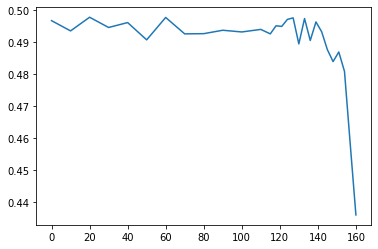

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k,test_scores)

In [ ]:
out = {}
for x in X_test.columns:
    temp = get_feature_importance(RF_classifier, x, X_test, Y_test,num_tests=10)
    print(temp)
    out[x] = temp


In [35]:
drop_cols = [k for k,v in out.items() if v < 0.0]
print(drop_cols)

['non_white_population', 'foreign_born_population', 'mean_household_income', 'total_housing_units', 'entertainment_industry', 'armed_forces_population', 'degree', 'incarcerated', 'eigvec_1', 'eigvec_4', 'eigvec_5', 'eigvec_7', 'eigvec_9', 'eigvec_14', 'eigvec_16', 'eigvec_19', 'eigvec_20', 'eigvec_21', 'eigvec_22', 'eigvec_23', 'eigvec_24', 'eigvec_25', 'eigvec_26', 'eigvec_27', 'eigvec_28', 'eigvec_29', 'eigvec_38', 'eigvec_39', 'eigvec_40', 'eigvec_41', 'eigvec_42', 'eigvec_44', 'eigvec_46', 'eigvec_49', 'eigvec_50', 'eigvec_51', 'eigvec_52', 'eigvec_53', 'eigvec_55', 'eigvec_56', 'eigvec_58', 'eigvec_59', 'eigvec_60', 'eigvec_62', 'eigvec_65', 'eigvec_66', 'eigvec_67', 'eigvec_70', 'eigvec_72', 'eigvec_73', 'eigvec_74', 'eigvec_76', 'eigvec_82', 'eigvec_84', 'eigvec_85', 'eigvec_86', 'eigvec_87', 'eigvec_88', 'eigvec_89', 'eigvec_90', 'eigvec_91', 'eigvec_93', 'eigvec_94', 'eigvec_96', 'eigvec_97', 'eigvec_98', 'eigvec_101', 'eigvec_102', 'eigvec_104', 'eigvec_105', 'eigvec_106', 'e

<BarContainer object of 180 artists>

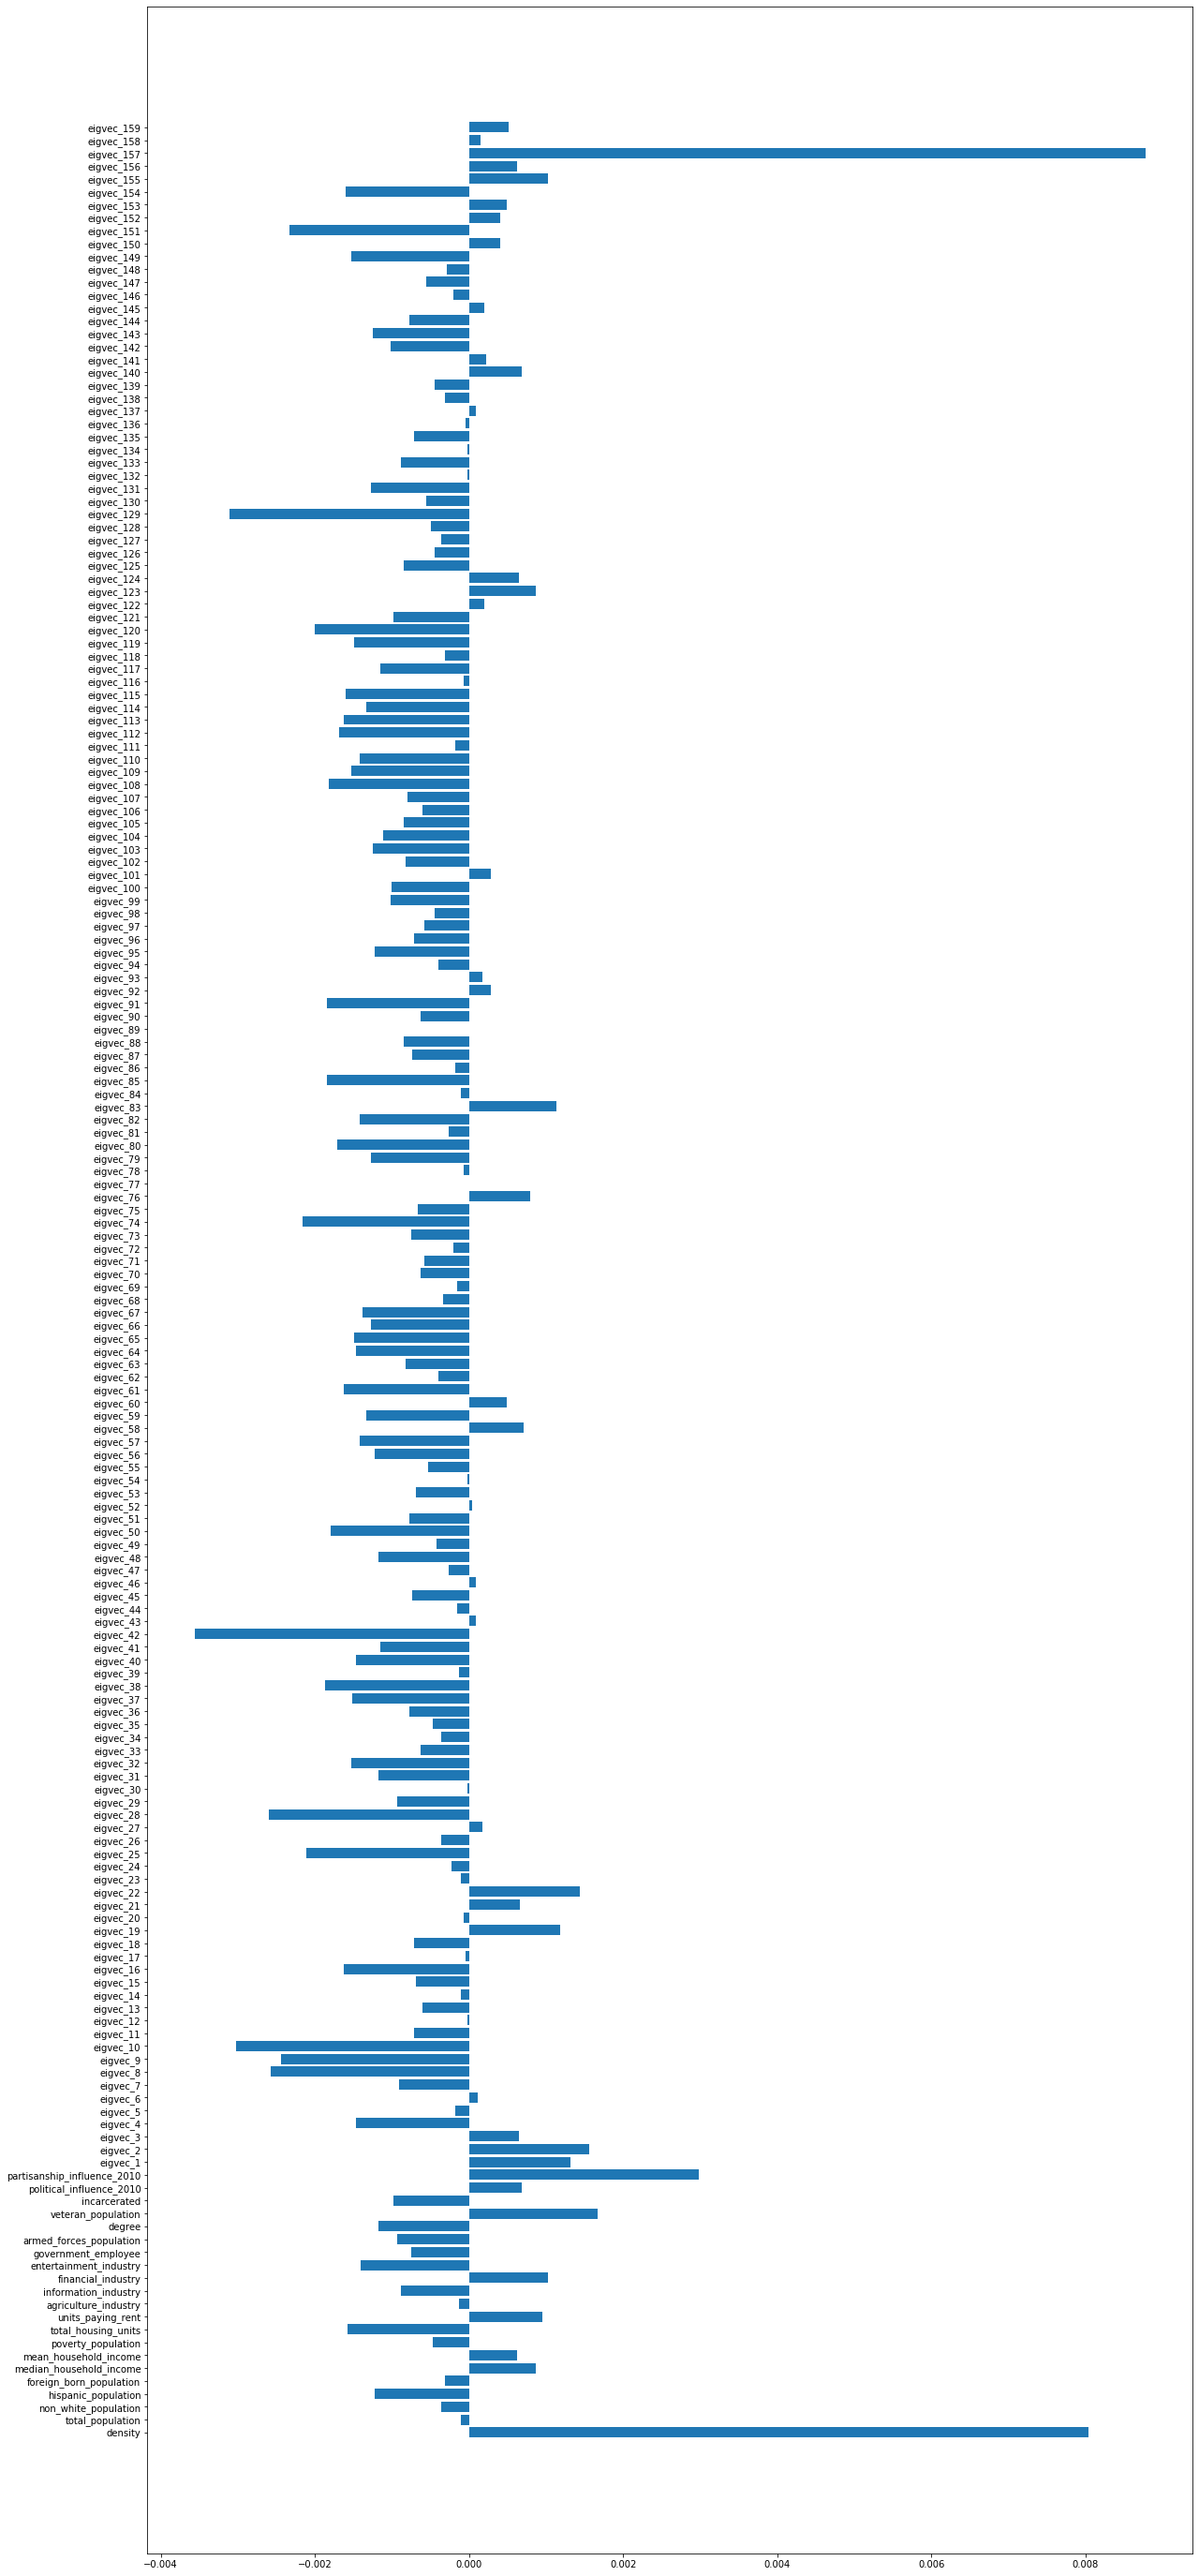

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,50))
plt.barh(list(out.keys()), list(out.values()))

In [16]:
drop_cols = ['non_white_population',
 'armed_forces_population',
 'eigvec_1',
 'eigvec_7',
 'eigvec_14',
 'eigvec_25',
 'eigvec_44',
 'eigvec_46',
 'eigvec_49',
 'eigvec_52',
 'eigvec_53',
 'eigvec_56',
 'eigvec_58',
 'eigvec_65',
 'eigvec_70',
 'eigvec_72',
 'eigvec_74',
 'eigvec_87',
 'eigvec_93',
 'eigvec_98',
 'eigvec_102',
 'eigvec_108',
 'eigvec_110',
 'eigvec_122',
 'eigvec_124',
 'eigvec_132']
reg_class2 = RandomForestClassifier(n_estimators=100, n_jobs = -1)
reg_class2.fit(X_train.drop(columns=drop_cols), Y_train)
print(reg_class2.score(X_test.drop(columns=drop_cols), Y_test))

0.4905333333333333


In [40]:
temp = list(X_train.columns)

In [46]:
[x for x in X_train.columns if x not in temp]

['non_white_population',
 'armed_forces_population',
 'eigvec_1',
 'eigvec_7',
 'eigvec_14',
 'eigvec_25',
 'eigvec_44',
 'eigvec_46',
 'eigvec_49',
 'eigvec_52',
 'eigvec_53',
 'eigvec_56',
 'eigvec_58',
 'eigvec_65',
 'eigvec_70',
 'eigvec_72',
 'eigvec_74',
 'eigvec_87',
 'eigvec_93',
 'eigvec_98',
 'eigvec_102',
 'eigvec_108',
 'eigvec_110',
 'eigvec_122',
 'eigvec_124',
 'eigvec_132']